<a href="https://colab.research.google.com/github/Naqeebullah11/My-Projects/blob/main/Iris_Dataset_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Required Libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Load and Prepare Iris Data


In [ ]:
iris = load_iris()
X = iris.data                      # Features
y = iris.target                    # Target labels
target_names = iris.target_names  # Class names

# 3. Scale the Data


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply PCA (2 Components for Visualization)


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# 5. Train-Test Split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42
)

# 6. Train SVM Classifier


In [ ]:
svm_model = SVC(kernel='linear')  # You can try 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

# 7. Predict and Evaluate


In [ ]:
y_pred = svm_model.predict(X_test)

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(
    y_test, y_pred, target_names=target_names))


Model Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30




# 8. Confusion Matrix


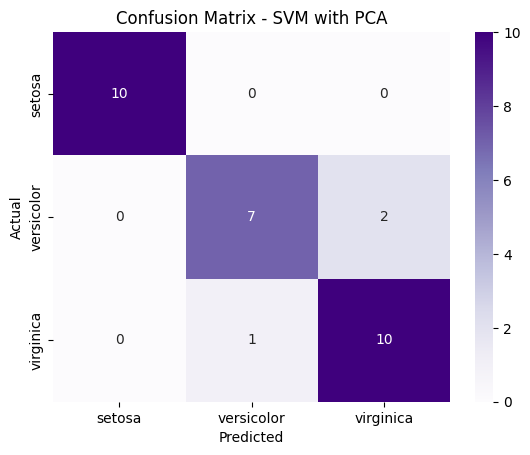

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)

sns.heatmap(cm_df, annot=True, cmap="Purples", fmt="d")
plt.title("Confusion Matrix - SVM with PCA")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9. Visualize 2D PCA with Class Separation


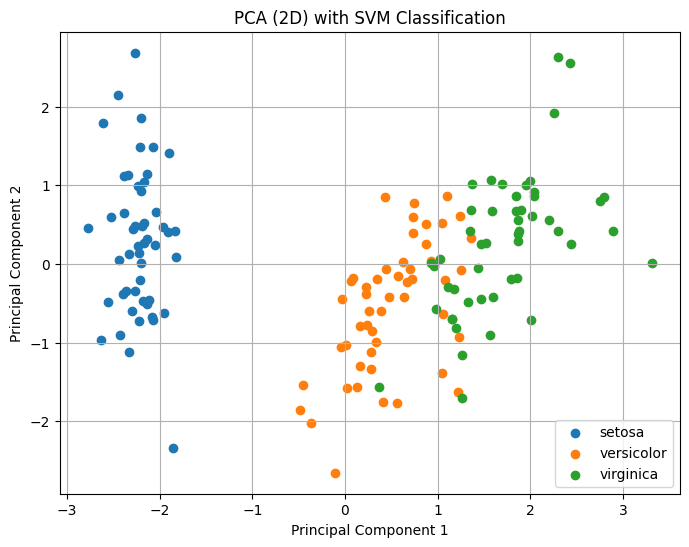

In [ ]:
plt.figure(figsize=(8, 6))
for i, name in enumerate(target_names):
    plt.scatter(
        X_pca[y == i, 0], X_pca[y == i, 1], label=name
    )

plt.title("PCA (2D) with SVM Classification")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()